# <center><strong> Cats and Dogs recognition </strong></center>

###### **By Mohamed Jamyl**

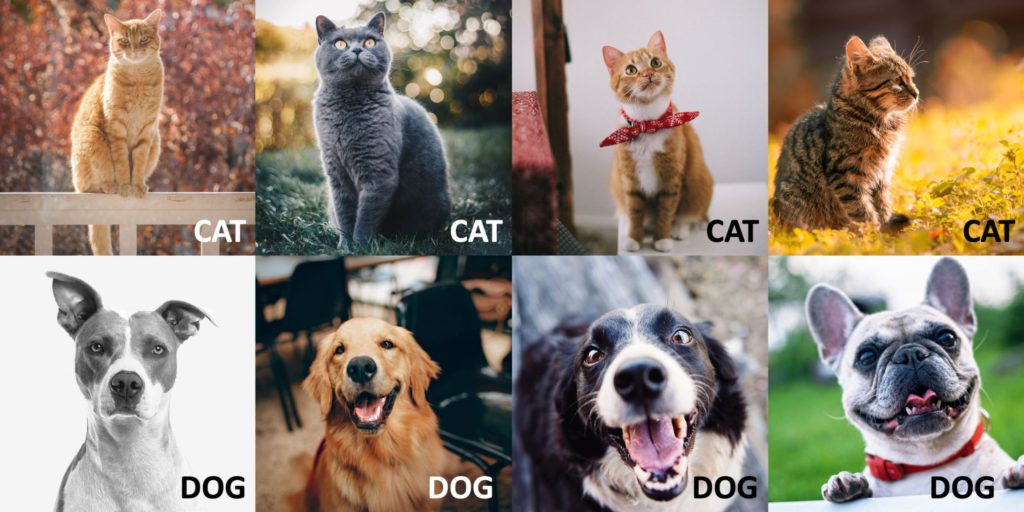

In [2]:
from IPython.display import Image
Image(filename='img.jpg')

------------------------------------
-----------------------------------

## **Import Libraries**

In [59]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

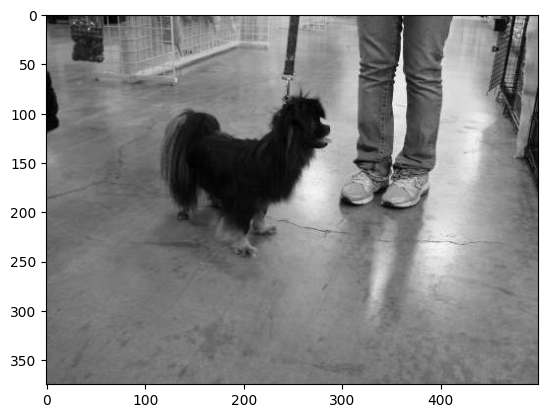

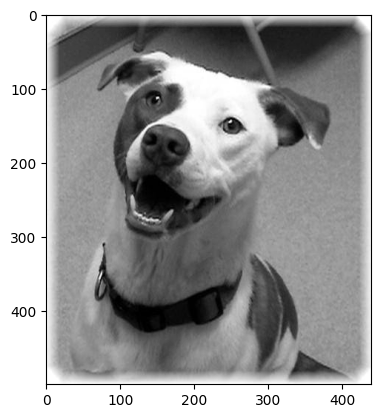

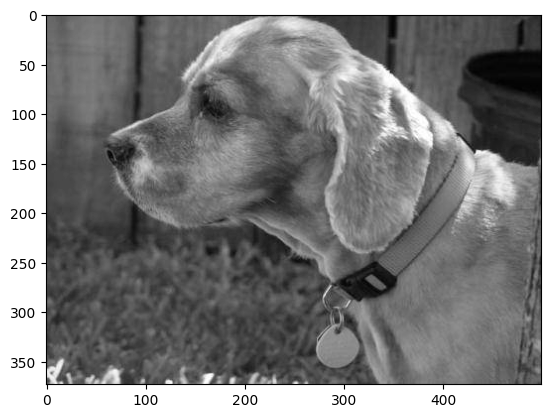

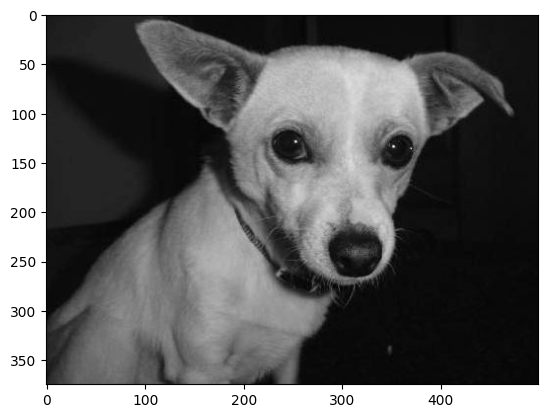

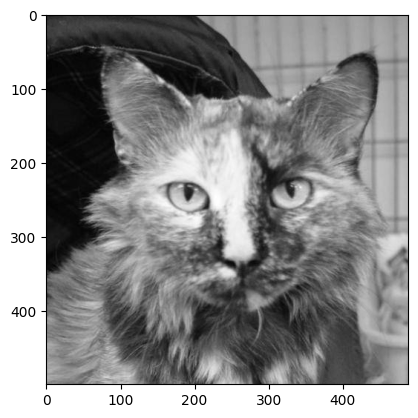

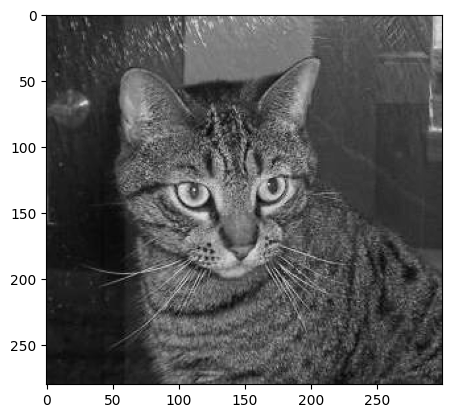

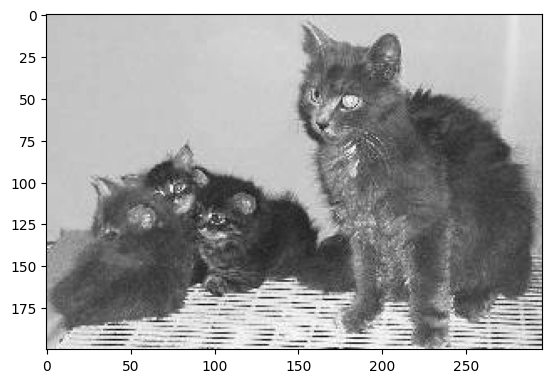

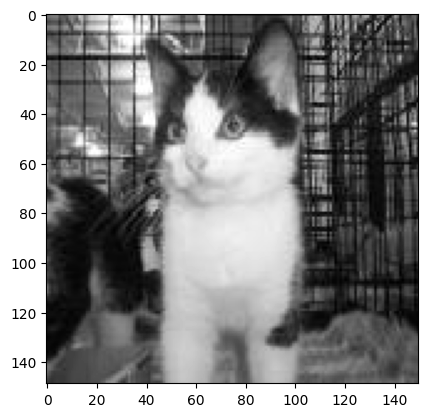

In [60]:
data_dir='/content/drive/MyDrive/project3/training_set' # main folder
categories = ['/content/drive/MyDrive/project3/training_set/dogs','/content/drive/MyDrive/project3/training_set/cats']  # names of folders in training_set
for category in categories:
    Path = os.path.join(data_dir,category) # create path to dogs and cats =  training_set/cat/1.png
    x=0
    for img in os.listdir(Path): # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(Path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray') #graph it
        plt.show()
        if x==4:
            break

In [61]:
print(img_array)

[[116 116 120 ...  89  88  59]
 [112 113 119 ...  91  98  49]
 [ 92  94 102 ...  79 100  31]
 ...
 [ 79  66  55 ...  80  79  80]
 [ 67  57  51 ...  98  91  86]
 [ 60  53  50 ...  98  84  79]]


In [62]:
print(f'shape : {img_array.shape}')

shape : (149, 150)


### **Editing all images and making them in one size**

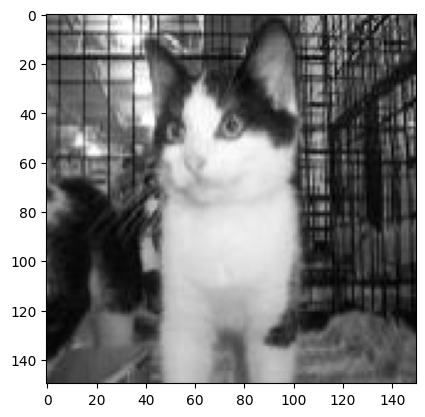

In [ ]:
img_size = 150

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [64]:
training_data=[]

def create_training_data():
    for category in categories:

        Path = os.path.join(data_dir, category)
        class_num = categories.index(category)

        for img in tqdm(os.listdir(Path)):

            img_array= cv2.imread(os.path.join(Path,img), cv2.IMREAD_GRAYSCALE)
            new_array= cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])


create_training_data()

100%|██████████| 1000/1000 [00:14<00:00, 67.81it/s]


In [65]:
print(training_data[:5])

[[array([[ 14,  13,   6, ...,  73, 172, 161],
       [ 11,  14,   7, ..., 156, 168, 161],
       [ 38,  17,   7, ..., 175, 175, 167],
       ...,
       [105, 100, 104, ..., 120, 113, 110],
       [104, 105, 107, ..., 119, 117, 112],
       [ 98, 103, 100, ..., 116, 114, 115]], dtype=uint8), 0], [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0], [array([[104, 103, 102, ...,  58,  50,  45],
       [104, 103, 101, ...,  48,  43,  46],
       [104, 103, 104, ...,  49,  49,  46],
       ...,
       [161, 235, 227, ...,  99, 102, 104],
       [ 83, 194, 234, ..., 104, 103, 103],
       [ 89, 182, 225, ..., 102,  96,  80]], dtype=uint8), 0], [array([[27, 27, 27, ..., 16, 16, 14],
       [27, 27, 28, ..., 16, 16, 15],
       [27, 27, 28, ..., 16, 16, 1

In [66]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
0
1
0
1
1


In [67]:
x=[]
y=[]

for  features, label in training_data:
    x.append(features)
    y.append(label)

x= np.array(x).reshape(-1, img_size, img_size)

y= np.array(y)

In [68]:
x[:1]

array([[[101, 100,  87, ..., 121, 119, 124],
        [ 99,  95,  92, ..., 120, 118, 122],
        [ 94,  91,  84, ..., 123, 123, 117],
        ...,
        [169, 162, 137, ..., 101, 133, 130],
        [170, 148, 137, ...,  73, 125, 132],
        [163, 153, 139, ...,  85, 113, 111]]], dtype=uint8)

In [69]:
y[:1]

array([0])

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=1234)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1602, 150, 150)
(401, 150, 150)
(1602,)
(401,)


In [71]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3),strides = (1,1), padding = 'VALID' ,input_shape = (img_size,img_size,1)),# SAME
        keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters = 32, kernel_size = (4,4),strides = (1,1), padding = 'VALID'  ),
        keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),

        keras.layers.Dense(128, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = tf.nn.sigmoid),
        ])


In [72]:
KerasModel.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
KerasModel.fit(x_train, y_train, epochs=10)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5288 - loss: 5.7603
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6992 - loss: 2.1601
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7933 - loss: 0.9912
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8527 - loss: 0.6027
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9349 - loss: 0.2519
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9633 - loss: 0.1200
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9856 - loss: 0.0629
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9905 - loss: 0.0387
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9940 - loss: 0.0233
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9991 - loss: 0.0119


In [74]:
print(KerasModel.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 71, 71, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 35, 35, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 35, 35, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 39200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       5,017,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,104,293 (57.62 MB)

 Trainable params: 5,034,721 (19.21 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 10,069,444 (38.41 MB)

None


In [75]:
from keras.models import load_model

KerasModel.save('cnn_cat_dog_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [76]:
loaded_model = load_model('cnn_cat_dog_model.h5')

### **Testing model**

In [ ]:
y_pred = loaded_model.predict(x_test)

y_pred_classes = (y_pred > 0.5).astype("int32")  

accuracy = np.mean(y_pred_classes.flatten() == y_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step
Accuracy on test data: 63.59%


In [78]:
img_path = "/content/drive/MyDrive/project3/test_set/cats/cat.4001.jpg"
img = cv2.imread(img_path)

img_resized = cv2.resize(img, (img_size, img_size))


img_array = img_resized / 255.0  
img_array = np.expand_dims(img_array, axis=0)  
